## T2* Fitting
The t2star_fit module contains classes for estimating T2* or T2. Both these and the classes in dce_fit are subclasses of Fitter, which means they can be used to fit a single T2* value (using the proc method) or an entire image (using the proc_image method).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sepal import t2star_fit
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## T2* estimation methods
The method estimates T2*, using the exponential relationship between echo time and signal:

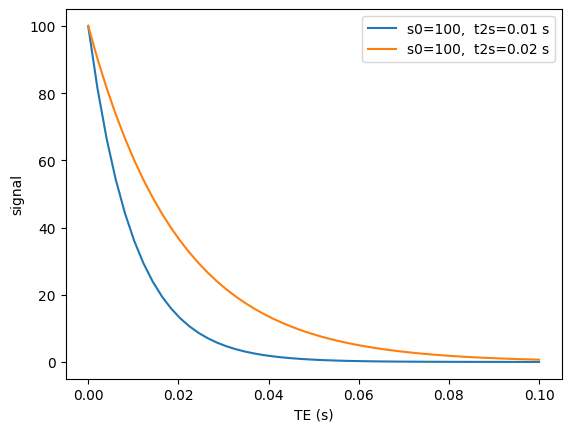

In [4]:
te_range = np.linspace(0, 100e-3, 50)
s_range_1 = t2star_fit.multiecho_signal(s0=100, t2s=10e-3, te=te_range)
s_range_2 = t2star_fit.multiecho_signal(s0=100, t2s=20e-3, te=te_range)
plt.plot(te_range, s_range_1, '-', label='s0=100,  t2s=0.01 s')
plt.plot(te_range, s_range_2, '-', label='s0=100,  t2s=0.02 s')
plt.xlabel('TE (s)')
plt.ylabel('signal');
plt.legend();

### T2* fitting: single voxel

Wall time: 0 ns
Fitted values (linear): s0 = 54.7, t2s = 0.0099 s
Wall time: 7.35 ms
Fitted values (non-linear): s0 = 91.8, t2s = 0.0083 s


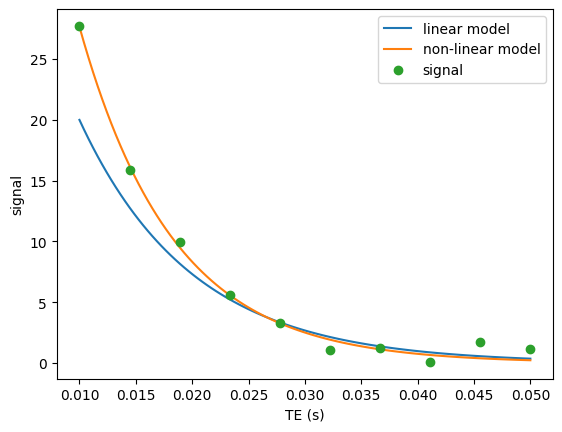

In [5]:
# Generate test data:
s0, t2s = 100, 8e-3
te = np.linspace(10e-3, 50e-3, 10)
te_plot_range = np.linspace(min(te), max(te), 100)

s = np.abs(s0 * np.exp(-te/t2s) + 1 * np.random.randn(*te.shape))

# Fit test data
min_signal = 0  # ignore echoes with signal lower than this

%time s0_est_lin, t2s_est_lin = t2star_fit.MultiEchoT2sLinear(te, min_signal).proc(s)
print(f"Fitted values (linear): s0 = {s0_est_lin:.1f}, t2s = {t2s_est_lin:.4f} s")
%time s0_est_nonlin, t2s_est_nonlin = t2star_fit.MultiEchoT2sNonLinear(te, min_signal).proc(s)
print(f"Fitted values (non-linear): s0 = {s0_est_nonlin:.1f}, t2s = {t2s_est_nonlin:.4f} s")

# Plot data:
plt.plot(te_plot_range, t2star_fit.multiecho_signal(s0_est_lin, t2s_est_lin, te_plot_range), '-', label='linear model')
plt.plot(te_plot_range, t2star_fit.multiecho_signal(s0_est_nonlin, t2s_est_nonlin, te_plot_range), '-', label='non-linear model')
plt.plot(te, s, 'o', label='signal')
plt.xlabel('TE (s)')
plt.ylabel('signal');
plt.legend();

### T2* fitting: fit 4D phantom data to generate a T2* map

In [6]:
# create T2* fitter object (non-linear method) as before
te = np.array((0.0030, 0.0085, 0.0140, 0.0195, 0.0250, 0.0305, 0.0360, 0.0415))
t2star_fitter = t2star_fit.MultiEchoT2sLinear(te, min_signal=50)

# use the proc_image to loop through all voxels in image
s0_map, t2s_map = t2star_fitter.proc_image('./T2s_data/mag4D.nii', threshold=200, dir='.', suffix='_linear', n_procs=3);

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(s0_map[:,:,36], cmap="gray_r", origin="lower", vmin=0, vmax=2000)
ax[0].set_title('s0')
cax = ax[1].imshow(t2s_map[:,:,36], cmap="gray_r", origin="lower", vmin=0, vmax=0.2)
ax[1].set_title('T2*')
fig.colorbar(cax);